# 📊 Proyecto de consolidación 1: Análisis de Calidad del Vino - Wine Quality Project

## 📌 Descripción del Proyecto
Este proyecto tiene como objetivo consolidar conocimientos sobre la manipulación de datos con **Pandas**, el manejo de bases de datos relacionales con **SQLite**, y la preparación de datos para una posible inserción en bases de datos NoSQL como **MongoDB**.  

A lo largo del análisis, se explorarán los conjuntos de datos de vinos tintos y blancos, identificando patrones en la calidad del vino, limpiando los datos, almacenándolos en SQLite y exportándolos en formato JSONLines.  

---

## 👥 Integrantes del equipo
- **Carlos Lorente Baeza**: carlos.lorente@alu.mbitschool.com
- **Alfredo Cueva Escudero**: alfredo.cueva@alu.mbitschool.com
- **Miguel Bezanilla Rodríguez**: miguel.bezanilla@alu.mbitschool.com
- **María García Rodríguez**: maria.grodriguez@alu.mbitschool.com

---

## 📂 Estructura del Notebook
### **Carga de datos**: Descarga y lectura de los datasets.  

EJ 1 - Carga de datos.

EJ 2 - Combinar datasets.

### **Preprocesamiento**: Limpieza y combinación de datos.  

EJ 3 - Filtrar atípicos y manejar datos ausentes.

### **Almacenamiento**: Inserción en SQLite y ejecución de consultas.  

EJ 4 - Almacenar los datos limpios en SQLite.

EJ 5 - Realizar 3 consultas en SQLite.

### **Exportación**: Generación de archivos JSONLines para bases de datos NoSQL. 

EJ 6 - Exportar datos a JSONLines.

### **Análisis Exploratorio**: Identificación de patrones en la calidad del vino.  

EJ 7 - Análisis de calidad de los vinos.

## 📂 Estructura del Proyecto

Para mantener el código limpio, reutilizable, ecalable y fácil de entender, hemos organizado el proyecto en las siguientes carpetas:

- **`utils/`** → <span style="color:red">Vacío</span>. Contiene herramientas auxiliares y funciones generales, pero todo se ha movido a `src/` pues no hay funciones requeridas a parte de las de los ejercios.
- **`src/`** → Contiene scripts con funciones modularizadas específicas para cada parte del ejercicio, como carga de datos, limpieza, almacenamiento en SQLite y exportación a JSONLines.
- **`data/`** → Almacena los datasets originales en formato CSV y la base de datos SQLite generada.
- **`notebooks/`** → Contiene el notebook principal (`main_notebook.ipynb`), donde se desarrollan los ejercicios llamando a los módulos de `src/` y `utils/`.


---

 # 0) Setup

In [1]:
import sys
import os

# Gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# SQLite
import sqlite3
import pandas as pd

# Desactivar advertencias (gráficos)
import warnings
warnings.filterwarnings("ignore")

# Añadir repo al sys path
repo_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
if repo_path not in sys.path:
    sys.path.append(repo_path)
print(f"Ruta añadida al sys.path: {repo_path}")

Ruta añadida al sys.path: c:\Users\MariaG\OneDrive\Documentos\Proyecto_de_Consolidacion_1_GRUPO_1


In [2]:
# -------------------------------------------------------
# Importar módulos
# -------------------------------------------------------

# EJERCICIO 1: Cargar datos
from src.E01_download_data import load_csv_to_dataframe

# EJERCICIO 2: Combinar los dataframes
from src.E02_combine_data import combine_wine_datasets

# EJERCICIO 3: Filtrar atípicos y manejar datos ausentes
from src.E03_clean_data import (
    detect_outliers_iqr_separated,
    detect_outliers_iqr,
    create_outlier_flag
)

# EJERCICIO 4: Combinar los dataframes
from src.E04_store_sqlite import (
    store_dataframe_to_sqlite   
)

# EJERCICIO 5: Realizar 3 consultas en SQLite
from src.E05_queries_sqlite import (
    sqlite_query_to_df
)


# # EJERCICIO 6: Exportar datos a JSONLines
# from src.E06_export_json import (
# )

# EJERCICIO 7: EDA calidad del vino
from src.E07_eda_wine_quality import (
    cluster_wines,
    plot_clusters_by_variable,
    optimal_clusters
) 

---
 # 📥 Carga de datos

 ## EJ 1) Cargar los datos en DataFrames de 

Se cargan los datos de los vinos en DataFrames de Pandas para su posterior análisis.  
Para ello, utilizamos la función `load_csv_to_dataframe`, que se encuentra en el módulo `src.E01_download_data` 📍.  

In [3]:
print("Carga de datos en DataFrames")

# URLs de los conjuntos de datos
url_red = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_white = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

df_red_wine = load_csv_to_dataframe(url_red)
df_white_wine = load_csv_to_dataframe(url_white)

print("*"*50)
display(df_red_wine.head())
display(df_white_wine.head())

Carga de datos en DataFrames
**************************************************


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## EJ 2) Combinar datos

Se combinan los datos de vinos tintos y blancos en un único DataFrame, añadiendo una columna que indica el tipo de vino.  
Para ello, utilizamos la función `combine_wine_datasets`, ubicada en el módulo `src.E02_combine_data` 📍.  

Además, se reemplazan los espacios en los nombres de las columnas por guiones bajos para mayor uniformidad.  

In [4]:
print("Combinar DataFrames")

wines_df_all = combine_wine_datasets(df_red_wine, df_white_wine)
wines_df_all.columns = wines_df_all.columns.str.replace(' ', '_')

print("*"*50)
print(f'Número de registros: {wines_df_all.shape[0]}')
print(f'Número de variables: {wines_df_all.shape[1]}')
print(f'Tipos de las columnas:\n{wines_df_all.dtypes}')

Combinar DataFrames
**************************************************
Número de registros: 6497
Número de variables: 13
Tipos de las columnas:
fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                object
dtype: object


---
# 🛁 Limpieza de datos

El preprocesamiento de datos es una etapa fundamental en cualquier proceso/aplicación de datos, ya que permite limpiar, transformar y estructurar la información para mejorar su calidad y utilidad.  

En este paso se incluyen tareas como las requeridas en esta práctica: la detección y eliminación de valores atípicos y el manejo de valores nulos. Sin embargo, existen muchas otras técnicas de preprocesamiento, como la normalización, la imputación de valores faltantes o la reducción de la dimensionalidad.  
La elección de las técnicas adecuadas depende del objetivo del análisis y del tipo de datos con los que se esté trabajando.  

## EJ 3.1) Valores atípicos

Detectaremos outliers de forma **separada para vinos tintos y blancos**. La razón para realizar esta separación es que los vinos tintos y blancos tienen características distintas, como el nivel de alcohol, acidez, azúcar residual, entre otros. Estas diferencias en las distribuciones pueden llevar a que los valores atípicos se comporten de manera diferente entre los dos tipos de vino. 

Se realizará sobre las columnas numéricas: Las columnas que contienen valores continuos y que son sensibles a variaciones extremas (como alcohol, acidity, residual sugar, etc.) los valores atípicos pueden reflejar problemas con la producción o la calidad del vino.

> 🔍 **Nota**: no se detectan outliers en quality, pues siendo una calificación en escala ordinal. Sin embargo, es útil para análisis exploratorio de datos.

A continuación, se grafica un **boxplot** para visualizar la distribución de las variables numéricas y detectar valores atípicos. Estos gráficos permiten observar  la dispersión de los datos, la simetría de su distribución y la presencia de outliers, lo cual facilita la detección de valores anómalos y la evaluación de la calidad de los datos.


### Componentes del Boxplot

- **Caja (box)**: La caja central representa el rango intercuartil (IQR) de los datos. La parte inferior de la caja corresponde al primer cuartil (Q1) y la parte superior al tercer cuartil (Q3). La distancia entre Q1 y Q3 se conoce como **rango intercuartil** y representa el 50% central de los datos.

- **Línea dentro de la caja (mediana)**: Esta línea es la mediana (equivalente a Q2) de los datos, que divide la caja en dos partes iguales y separa la mitad inferior de los datos de la mitad superior.

- **Bigotes (whiskers)**: Los bigotes se extienden desde los cuartiles (Q1 y Q3) hasta el valor más cercano que no sea un valor atípico. Los valores fuera de este rango se consideran <span style="color:red">outliers</span>.

- **<span style="color:red">Outliers</span> (valores atípicos)**: Son los puntos que se encuentran fuera de los bigotes del boxplot. Estos valores son considerados extremos y representan observaciones que se alejan significativamente del resto de los datos.

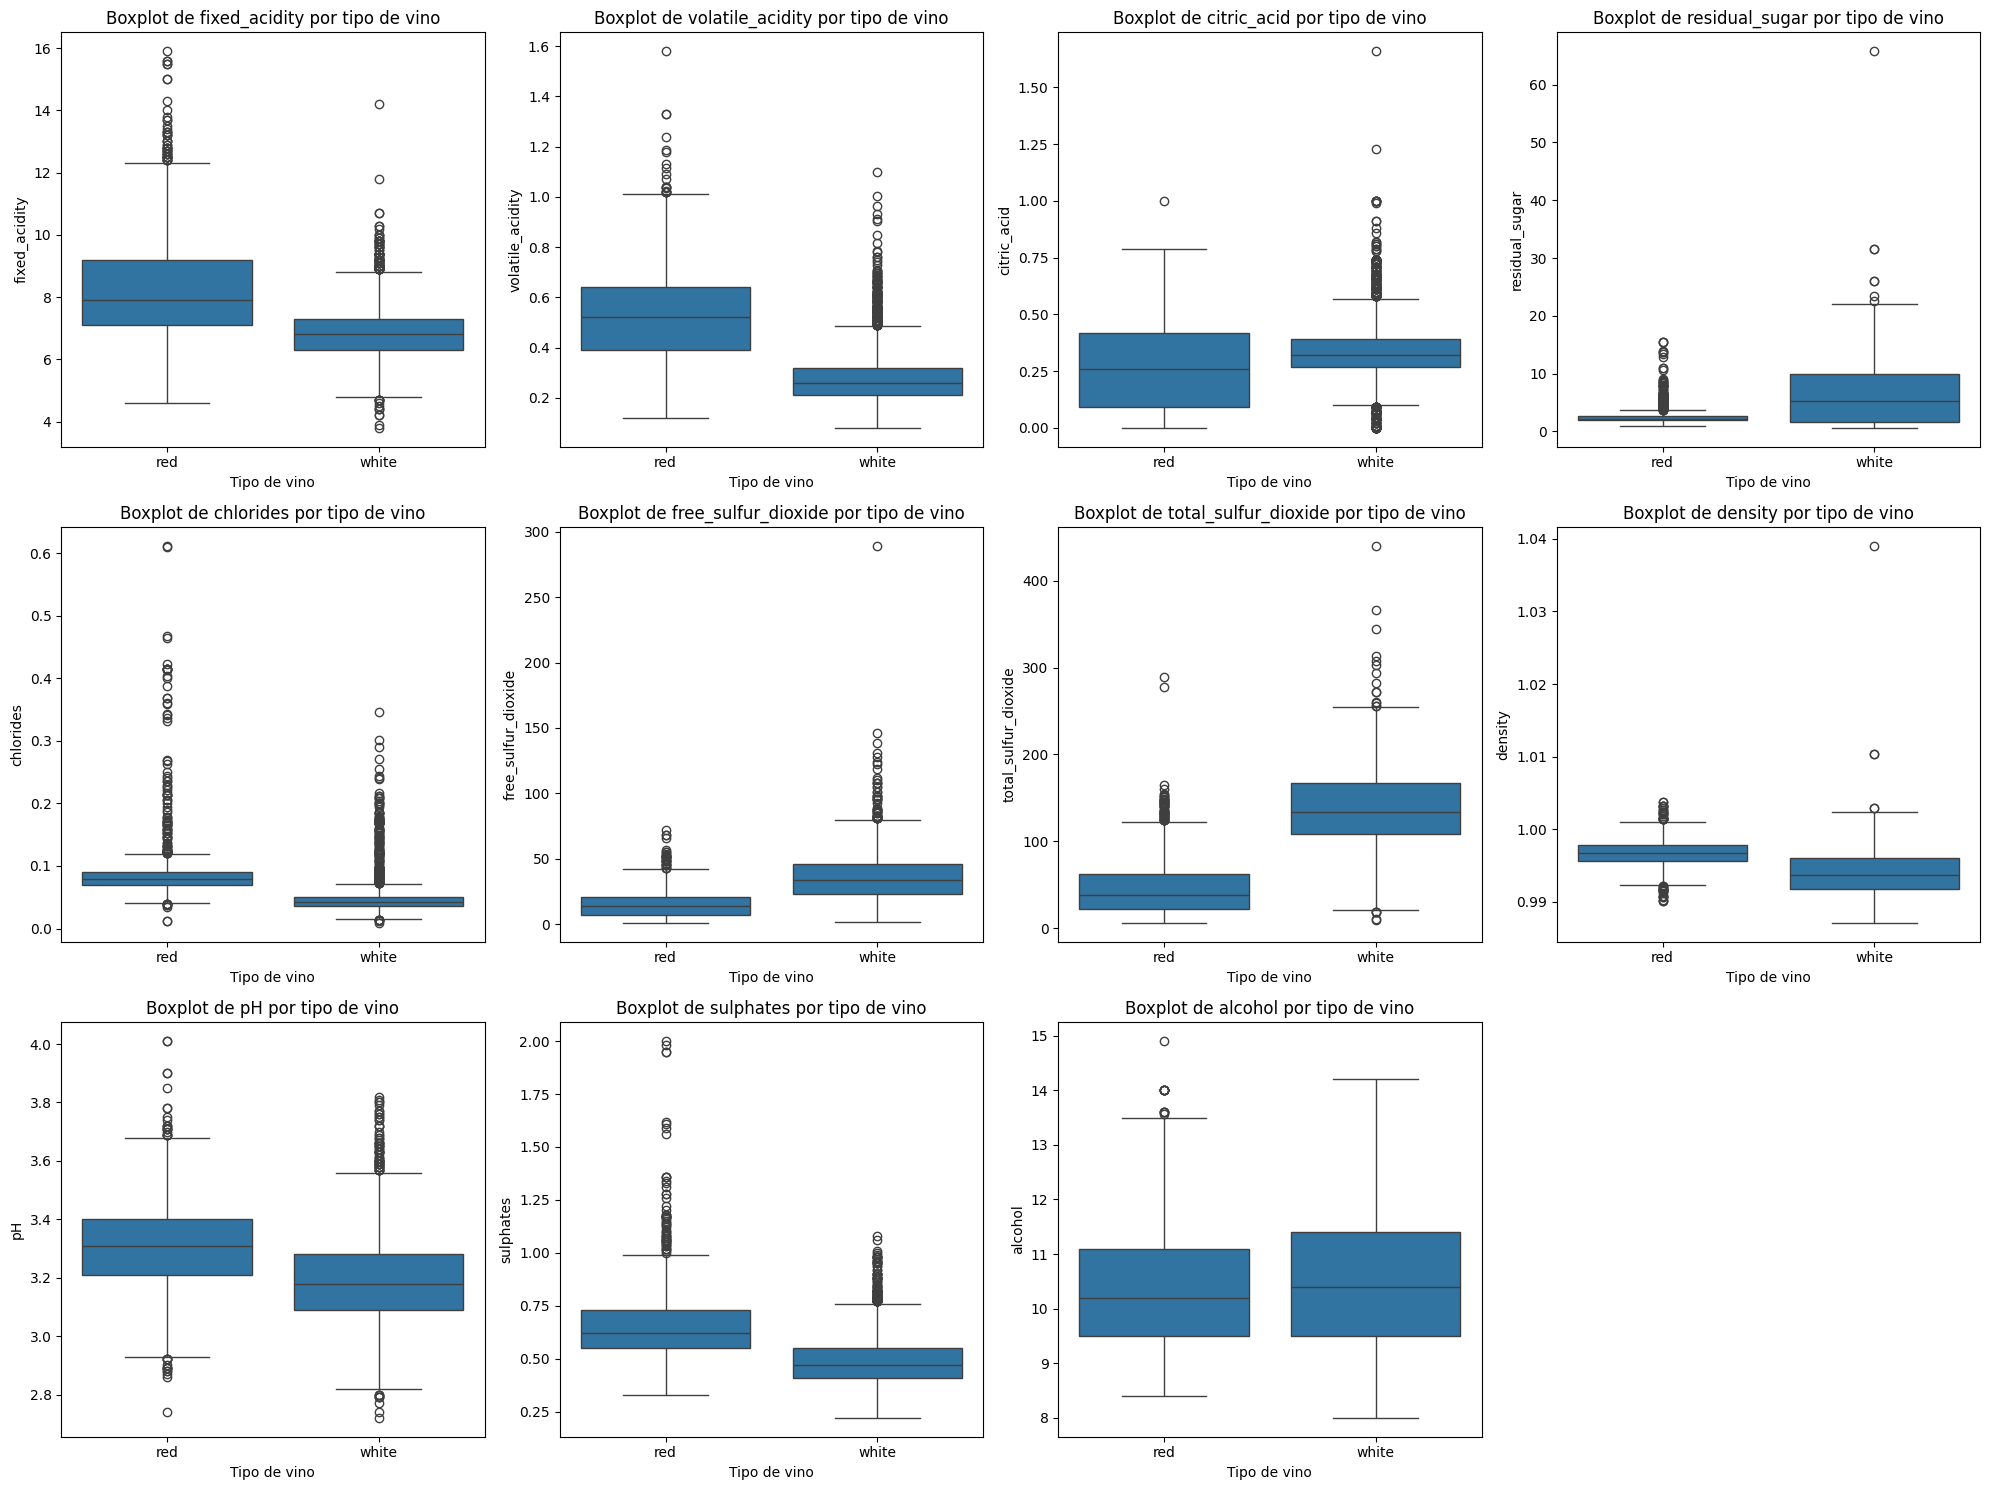

In [5]:
# Lista de las columnas a graficar
columns_to_plot = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
                   'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
                   'pH', 'sulphates', 'alcohol']

# Boxplot: configuración y gráfico
num_cols = 4
num_rows = -(-len(columns_to_plot) // num_cols)  # Calcular el número de filas necesarias
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()  # Convertir la matriz de ejes en una lista

for i, column in enumerate(columns_to_plot):
    sns.boxplot(data=wines_df_all, x='wine_type', y=column, ax=axes[i])
    axes[i].set_title(f'Boxplot de {column} por tipo de vino')
    axes[i].set_xlabel('Tipo de vino')
    axes[i].set_ylabel(column)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Se observan valores atípicos en casi todas las caracteríticas, a continuación se hará un análisis de estos outliers. La función *detect_outliers_iqr_separated* detecta outliers en los vinos, estos se detectan utilizando el **rango intercuartil (IQR)** porque es un método robusto y eficaz para identificar valores atípicos en distribuciones no normales. El IQR es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1), lo que mide la dispersión central de los datos. El umbral de 1.5 veces el IQR se usa comúnmente para definir los límites superior e inferior:

- **Límite inferior**: Q1 - 1.5 * IQR
- **Límite superior**: Q3 + 1.5 * IQR

Cualquier valor que caiga fuera de estos límites se considera un **outlier**. Este enfoque tiene la ventaja de ser menos sensible a los valores extremos que otros métodos, como el uso de la media y la desviación estándar, que pueden verse influenciados por los propios outliers.

### Ajuste del Umbral de IQR de 1.75 a 1.85

Se ha realizado un ajuste en el umbral del **rango intercuartil (IQR)** para la detección de outliers, pasando de **1.75 a 1.85**. Este cambio tiene varias razones y se ha definido tras varias pruebas:


1. **Mayor Conformidad con la Variabilidad Natural de los Datos:**
   - En el dataset de vinos, es normal que existan ciertas variaciones en las características, como la acidez o el contenido de alcohol, dependiendo del tipo de vino y la región de producción. Un umbral de **1.75** identificaba muchos de estos valores como outliers, aunque en realidad eran variaciones naturales. Al aumentar el umbral a **1.85**, se logra un análisis más robusto, filtrando solo aquellos valores verdaderamente atípicos.

2. **Reducción de la Pérdida de Datos:**
   - Eliminar demasiados datos con umbrales bajos puede llevar a perder registros valiosos, especialmente en datasets donde las observaciones son limitadas. Con un umbral de **1.85**, se reduce la eliminación de datos sin perder información clave para el análisis.


4. **Mayor Robustez en la Identificación de Outliers Reales:**
   - El ajuste a **1.85** permite identificar con mayor precisión los verdaderos outliers, evitando marcar como anómalos los valores que están dentro de un rango natural de variabilidad.

5. **Ajuste a la Distribución de los Datos:**
   - Este ajuste también responde al análisis de la distribución de las columnas numéricas en el dataset, que sugiere que un umbral de **1.85** es adecuado para mantener la representatividad de los datos sin perder información relevante. Los datos de los vinos rojos y blancos pueden presentar distribuciones que, aunque no sean perfectamente simétricas, son razonables dentro del contexto de producción. Usar un umbral de **1.85** permite que los valores que se desvían un poco del promedio, pero siguen dentro de un rango esperado para el tipo de vino, no sean marcados como outliers.

Para ello, utilizamos la función `detect_outliers_iqr_separated`, ubicada en el módulo `src.E03_clean_data` 📍. 

In [6]:
print("Detección de valores atípicos")

# df_with_outliers = detect_outliers_iqr(wines_df)
df_with_outliers_all = detect_outliers_iqr_separated(wines_df_all, threshold = 1.85)
df_with_outliers = df_with_outliers_all.drop('quality_outlier', axis=1)


display(df_with_outliers.head())

Detección de valores atípicos


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,...,volatile_acidity_outlier,citric_acid_outlier,residual_sugar_outlier,chlorides_outlier,free_sulfur_dioxide_outlier,total_sulfur_dioxide_outlier,density_outlier,pH_outlier,sulphates_outlier,alcohol_outlier
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,False,False,False,False,False,False,False,False,False,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,False,False,False,False,False,False,False,False,False,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,False,False,False,False,False,False,False,False,False,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,False,False,False,False,False,False,False,False,False,False
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,False,False,False,False,False,False,False,False,False,False


In [7]:
print("Outliers por columna:")

outlier_columns = [col for col in df_with_outliers.columns if col.endswith('_outlier')]
outlier_counts = {col: df_with_outliers[col].sum() for col in outlier_columns}
display(outlier_counts)

Outliers por columna:


{'fixed_acidity_outlier': np.int64(93),
 'volatile_acidity_outlier': np.int64(144),
 'citric_acid_outlier': np.int64(189),
 'residual_sugar_outlier': np.int64(147),
 'chlorides_outlier': np.int64(267),
 'free_sulfur_dioxide_outlier': np.int64(50),
 'total_sulfur_dioxide_outlier': np.int64(37),
 'density_outlier': np.int64(26),
 'pH_outlier': np.int64(42),
 'sulphates_outlier': np.int64(111),
 'alcohol_outlier': np.int64(1)}

Existen varias formas de tratar los outliers en un conjunto de datos:

- Eliminar los outliers: Se eliminan los valores extremos para evitar que distorsionen el análisis.
- Imputar los outliers: Se reemplazan los valores atípicos por valores más razonables como la media o la mediana.
- Transformar los datos: Se aplican transformaciones estadísticas (como la normalización) para ajustar la influencia de los outliers.
- Mantener los outliers: Se conservan los outliers si son importantes para el análisis, como en el caso de eventos raros.
- Filtrar los outliers para análisis específicos: Se analizan los outliers por separado sin modificar el resto de los datos.

En este ejercicio, se optará por **filtrar atípicos**, por lo que se usarán técnicas de Pandas para eliminarlos.

In [8]:
df_combined_with_outlier_flag = create_outlier_flag(df_with_outliers)
df_combined_with_outlier_flag['outlier_flag'].sum()

np.int64(926)

In [9]:
wine_wo_outliers_all = df_combined_with_outlier_flag[df_combined_with_outlier_flag['outlier_flag'] == False]
# Eliminar las columnas que contienen '_outlier' en el nombre (limpiar df)
wine_wo_outliers = wine_wo_outliers_all.loc[:, ~wine_wo_outliers_all.columns.str.contains('outlier')]

print("*"*50)
print(f'Número de registros antes de filtrar outliers: {wines_df_all.shape[0]}')
print(f'Número de registros después de filtrar outliers: {wine_wo_outliers.shape[0]}')

**************************************************
Número de registros antes de filtrar outliers: 6497
Número de registros después de filtrar outliers: 5571


## EJ 3.2) Valores nulos

Los valores nulos son aquellos registros en un dataset que **no contienen ningún dato o tienen valores ausentes**. Estos valores pueden aparecer por diversas razones, como errores en la recolección de datos, problemas de procesamiento o datos no disponibles en ciertas observaciones. 

En un análisis de datos, los valores nulos pueden afectar la precisión de los resultados, por lo que es común tratarlos antes de realizar cualquier análisis o modelado. Las estrategias comunes para manejar los valores nulos incluyen eliminarlos, reemplazarlos con valores específicos (como la media, la mediana o el valor más frecuente) o utilizar técnicas más avanzadas de imputación.

In [10]:
wine_wo_outliers.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

En este caso ningún dato es nulo. En este paso termina el preprocesamiento de loa datos.

In [11]:
cleaned_wine_df = wine_wo_outliers

---
# 🛢️ SQLite
## EJ 4) Almacenar los datos limpios en SQLite

QLite es una biblioteca C que proporciona una base de datos ligera basada en disco que No requiere un proceso de servidor separado y permite acceder a la base de datos utilizando una variante no estándar del lenguaje de consulta SQL. Para ello, utilizamos la función `cleaned_wine_df`, ubicada en el módulo `src.E04_store_sqlite` 📍.  

In [12]:
store_dataframe_to_sqlite(cleaned_wine_df, '../data', 'wine_data.db', 'wine_quality')

## EJ 5) Realizar 3 consultas en SQLite

Para ello, utilizamos la función `sqlite_query_to_df`, ubicada en el módulo `src.E05_queries_sqlite` 📍.  

**Consulta 1: ¿Cuál es el promedio de calidad (quality) por tipo de vino (type)?**

Esta consulta calcula el promedio de la columna quality agrupado por el tipo de vino (wine_type), para obtener el promedio de calidad por cada tipo de vino.

In [13]:
db_path = '../data/wine_data.db'
table_name = 'wine_quality'
query_c1 = f"""
    SELECT wine_type, AVG(quality) AS avg_quality
    FROM wine_quality
    GROUP BY wine_type;
"""

df_c1 = sqlite_query_to_df(db_path, table_name, query_c1)

display(df_c1)

,wine_type,avg_quality
0,red,5.649770
1,white,5.934645


**Consulta 2: Vinos con nivel de alcohol superior a 10.5, agrupados por tipo**

Esta consulta cuenta cuántos vinos tienen un nivel de alcohol superior a 10.5, agrupados por el tipo de vino (wine_type).

In [14]:
query_c2 = f"""
    SELECT wine_type, COUNT(*) AS count
    FROM wine_quality
    WHERE alcohol > 10.5
    GROUP BY wine_type;
"""

# Obtener los datos en un DataFrame
df_c2 = sqlite_query_to_df(db_path, table_name, query_c2)

display(df_c2)

,wine_type,count
0,red,499
1,white,1989


**Consulta 3: Conteo de vinos por nivel de acidez, agrupados en rangos**

Esta consulta agrupa los vinos por fixed_acidity en rangos definidos (0-5, 5-10, 10-15 y más de 15), y cuenta cuántos vinos hay en cada rango, además de hacerlo para cada tipo de vino (wine_type).

In [15]:
query_c3 = f"""
    SELECT wine_type,
       CASE
           WHEN fixed_acidity BETWEEN 0 AND 5 THEN '0-5'
           WHEN fixed_acidity BETWEEN 5 AND 10 THEN '5-10'
           WHEN fixed_acidity BETWEEN 10 AND 15 THEN '10-15'
           ELSE '15+' 
       END AS acidity_range,
       COUNT(*) AS count
    FROM wine_quality
    GROUP BY wine_type, acidity_range;
"""

# Obtener los datos en un DataFrame
df_c3 = sqlite_query_to_df(db_path, table_name, query_c3)

display(df_c3)

,wine_type,acidity_range,count
0,red,0-5,4
1,red,10-15,184
2,red,5-10,1114
3,white,0-5,28
4,white,5-10,4241


---
# 📜 JSONLines
## EJ 6) Exportar datos a JSONLines

Para facilitar la integración con bases de datos NoSQL como MongoDB, convertiremos los datos obtenidos de una consulta en formato **JSONLines (`.jsonl`)**. Este formato almacena cada fila del DataFrame como un objeto JSON en una línea independiente, lo que facilita su procesamiento y lectura incremental.

### ¿Qué estructura de datos de Python es la más similar a un documento NoSQL?
La estructura de datos más similar a un documento NoSQL en Python es un **diccionario (`dict`)**. En bases de datos como MongoDB, los documentos se representan en JSON, que en Python se corresponde directamente con diccionarios anidados.

### ¿Qué problemas podrían surgir al transformar un DataFrame en JSONLines?
Al convertir un DataFrame a JSONLines, pueden surgir algunos desafíos:
- **Tipos de datos no compatibles**: Algunos tipos de datos de Pandas y NumPy no tienen una conversión directa a JSON.
- **Pérdida de precisión**: En algunos casos, los valores numéricos pueden perder precisión o cambiar de formato.
- **Manejo de valores nulos**: Pandas usa `NaN` para valores nulos, pero JSON no los admite, por lo que se deben convertir a `null`.

### ¿Qué sucede si añadimos una columna que contiene un `np.array`?
Si una columna contiene un `np.array`, Pandas intentará serializarla, pero en JSONLines los arrays deben representarse en un formato compatible, como una lista de Python (`list`). Si el `np.array` no se convierte explícitamente, podría generar errores o almacenarse como una cadena de texto en JSON.

### ¿Qué sucede si añadimos una columna que contiene un `pd.Timestamp`?
Los objetos `pd.Timestamp` representan fechas y horas, pero al convertirlos a JSONLines pueden transformarse en cadenas de texto en formato ISO 8601 (ej. `"2025-02-26T12:34:56"`) o en enteros que representan la marca de tiempo (timestamp). Es importante asegurarse de que el formato elegido sea compatible con la base de datos que usará estos datos.

En este ejercicio, exploraremos estas transformaciones y aseguraremos que los datos exportados sean adecuados para su almacenamiento en NoSQL.


---
# 🍷 Análisis Exploratorio de los datos (EDA)

## EJ 7)  Análisis de calidad de los vinos

El **Análisis Exploratorio de Datos (EDA)** es un proceso fundamental en cualquier proyecto de ciencia de datos. Su objetivo es comprender la estructura y las características del dataset, identificar patrones, detectar valores atípicos y encontrar posibles relaciones entre las variables. 

### Importancia del EDA
- Permite obtener información clave sobre la distribución de los datos.
- Facilita la comprensión de los datos.
- Ayuda a formular hipótesis y guiar los siguientes pasos del análisis.

En este proyecto, el EDA se basa en extraer estadísticas relevantes sobre la calidad del vino y sus características. Se realizarán análisis como:
- Comparación y estudio de las características de los vinos mediante análisis estadístico.
- Relación entre los componentes mediante correlación de variables.


Estos análisis nos proporcionarán una visión detallada del conjunto de datos, facilitando la toma de decisiones en los siguientes pasos del proyecto.


### i) Estudio de las características de tintos y blancos  

Lo primero que haremos será tener una primera visión de la estructura del dataframe y la naturaleza de los datos, lo cual nos permititá sacar conslusiones sobre las características de estos vinos.

In [16]:
print("Información por columna:")
display(cleaned_wine_df.info())
print("*"*50)

# Descripción estadística para vinos tintos
print("Descripción estadística para vinos tintos:")
display(cleaned_wine_df[cleaned_wine_df["wine_type"] == "red"].describe())

# Descripción estadística para vinos blancos
print("\nDescripción estadística para vinos blancos:")
display(cleaned_wine_df[cleaned_wine_df["wine_type"] == "white"].describe())

Información por columna:
<class 'pandas.core.frame.DataFrame'>
Index: 5571 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         5571 non-null   float64
 1   volatile_acidity      5571 non-null   float64
 2   citric_acid           5571 non-null   float64
 3   residual_sugar        5571 non-null   float64
 4   chlorides             5571 non-null   float64
 5   free_sulfur_dioxide   5571 non-null   float64
 6   total_sulfur_dioxide  5571 non-null   float64
 7   density               5571 non-null   float64
 8   pH                    5571 non-null   float64
 9   sulphates             5571 non-null   float64
 10  alcohol               5571 non-null   float64
 11  quality               5571 non-null   int64  
 12  wine_type             5571 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 609.3+ KB


None

**************************************************
Descripción estadística para vinos tintos:


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000
mean,8.216667,0.523614,0.253886,2.199078,0.078661,15.213518,42.926267,0.996569,3.322903,0.635684,10.414977,5.649770
std,1.587211,0.169667,0.186325,0.459831,0.015324,9.148054,27.374603,0.001697,0.142709,0.120833,1.023332,0.779392
min,4.900000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.700000,3.000000
25%,7.100000,0.390000,0.080000,1.900000,0.069000,8.000000,22.000000,0.995500,3.220000,0.550000,9.500000,5.000000
50%,7.800000,0.520000,0.240000,2.100000,0.078000,13.000000,36.000000,0.996600,3.320000,0.615000,10.200000,6.000000
75%,9.100000,0.630000,0.400000,2.500000,0.087000,21.000000,57.000000,0.997600,3.410000,0.710000,11.000000,6.000000
max,13.000000,1.090000,0.740000,3.800000,0.126000,46.000000,135.000000,1.001000,3.750000,1.060000,14.000000,8.000000



Descripción estadística para vinos blancos:


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000
mean,6.832408,0.266343,0.325617,6.393874,0.042361,34.916725,137.456547,0.993912,3.189103,0.484479,10.569383,5.934645
std,0.762986,0.079693,0.091022,4.963955,0.010100,15.447546,41.477014,0.002898,0.142251,0.103949,1.214482,0.859476
min,4.700000,0.080000,0.050000,0.600000,0.012000,2.000000,19.000000,0.987110,2.790000,0.220000,8.400000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.035000,24.000000,107.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.310000,5.200000,0.042000,34.000000,133.000000,0.993600,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.370000,9.800000,0.049000,45.000000,166.000000,0.995960,3.280000,0.540000,11.400000,6.000000
max,9.100000,0.520000,0.610000,23.500000,0.075000,88.000000,272.000000,1.002400,3.630000,0.800000,14.200000,9.000000


El análisis estadístico realizado de los vinos tintos y blancos revela diferencias clave en su composición química y propiedades sensoriales.  

> 🔍**Nota:** Para interpretar y contrastar los valores obtenidos en el análisis estadístico, se han consultado fuentes en línea sobre la composición química del vino (los componentes presentes en el dataset) y su impacto en sus características. Esto ha permitido contextualizar mejor las características de estos vinos y y sus diferencias.

**Acidez:**  
Los vinos tintos tienen una mayor acidez fija en promedio (8.22) en comparación con los vinos blancos (6.83). Sin embargo, los blancos presentan una menor acidez volátil (0.27 frente a 0.52 en los tintos), lo que indica que los tintos pueden percibirse con un aroma más intenso y complejo.  

**Azúcar residual:**  
Una de las diferencias más notorias es el contenido de azúcar residual. Los vinos blancos tienen un promedio de 6.39 g/L, mientras que los tintos apenas alcanzan los 2.2 g/L, lo que explica por qué los blancos suelen ser percibidos como más dulces.  

**Dióxido de azufre (SO₂):**  
El dióxido de azufre, el cual según la información encontrada es utilizado como conservante, está presente en mayor cantidad en los vinos blancos (34.92 de SO₂ libre y 137.46 total) en comparación con los tintos (15.21 libre y 42.93 total). Esto indica que los blancos tienen una mayor protección contra la oxidación y pueden tener una vida útil más larga.  

**pH y sulfatos:**  
El pH de los tintos (3.32) es ligeramente más alto que el de los blancos (3.18), lo que sugiere una menor acidez percibida en los tintos. En cuanto a los sulfatos, los vinos tintos presentan una concentración media superior (0.64 frente a 0.48 en los blancos), lo que contribuye a su estabilidad y estructura en boca.  

**Alcohol y calidad:**  
El contenido alcohólico es ligeramente superior en los blancos (10.57%) en comparación con los tintos (10.41%), aunque como se puede apreciar, la diferencia no es significativa. 

En términos de calidad, los blancos tienen un rango más amplio (3-9) y una media más alta (5.93) en comparación con los tintos (rango de 3-8 y media de 5.65), lo que sugiere una mayor presencia de vinos blancos de calidad superior en el dataset.  

📌 **Conclusión  en base a los resultados**

Los vinos blancos destacan por su mayor dulzura y mayor concentración de conservantes, lo que los hace más longevos y frescos. En cambio, los tintos presentan una estructura más compleja con mayor acidez volátil y contenido en sulfatos, lo que influye en su sabor y estabilidad. Estas diferencias explican las preferencias de los consumidores y las distintas aplicaciones gastronómicas de cada tipo de vino.  


### Correlación entre Variables

La matriz de correlación nos permite identificar relaciones entre las variables numéricas del conjunto de datos. Esto ayuda a entender cómo las variables interactúan entre sí y cuáles pueden influir en la percepción de la calidad del vino.


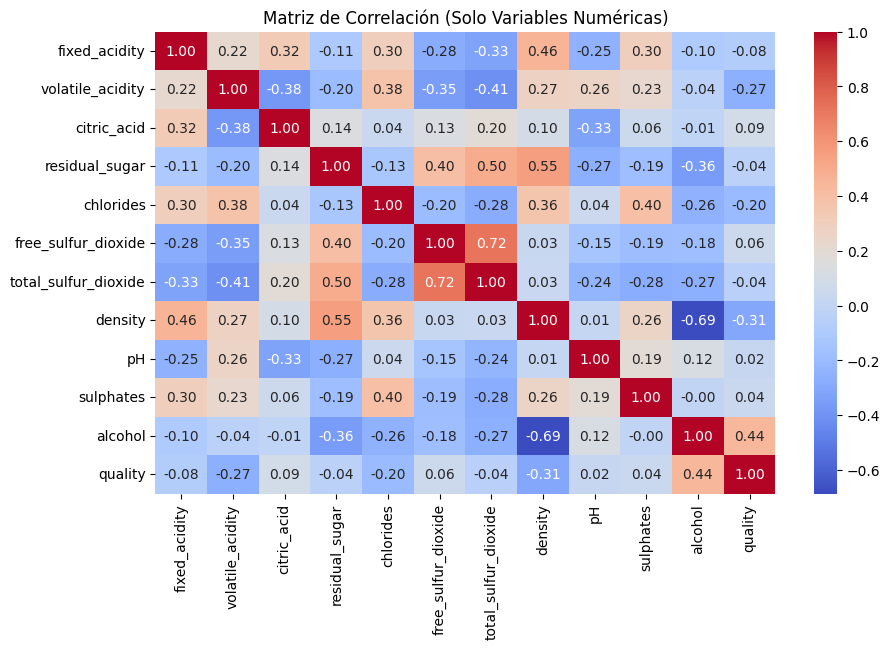

In [17]:
numeric_columns = wines_df_all.select_dtypes(include=['float64', 'int64'])

# Generar la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_columns.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación (Solo Variables Numéricas)")
plt.show()

📌 **Conclusión  en base a los resultados**

Puntos clave a destacar:

- **Relación entre dióxido de azufre libre y total:** Se observa una alta correlación (0.72), lo que indica que suelen aumentar juntos.
- **Densidad y azúcar residual:** Presentan una correlación moderada (0.55), lo que sugiere que el contenido de azúcar influye en la densidad del vino.
- **Alcohol y calidad:** Existe una correlación positiva (0.44), lo que indica que vinos con mayor grado alcohólico tienden a ser mejor valorados.
- **Acidez volátil y calidad:** Se observa una correlación negativa (-0.27), lo que puede indicar que altos niveles de acidez volátil afectan negativamente la calidad del vino.

### Analísis de la calidad del vino

Para entender cómo se distribuyen las calificaciones de calidad entre tintos y blancos se realizará un diagrama de barras que muestre la distribución de la calidad del vino presente en el dataset.

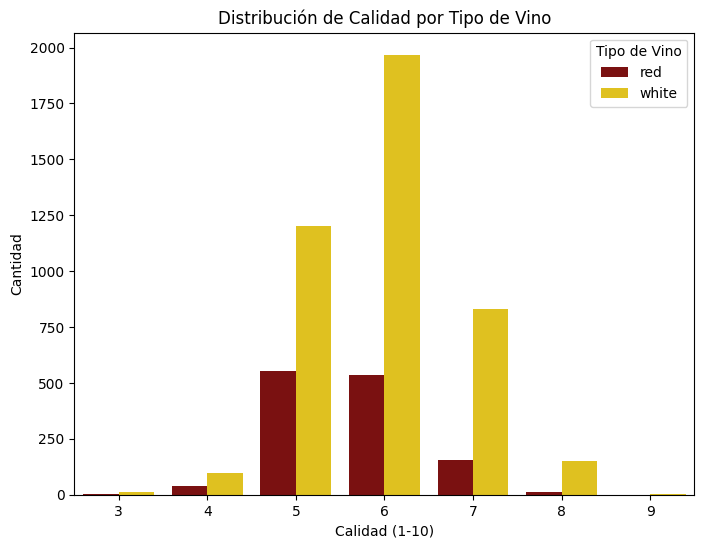

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(data=cleaned_wine_df, x="quality", hue="wine_type", palette=["#8B0000", "#FFD700"])
plt.title("Distribución de Calidad por Tipo de Vino")
plt.xlabel("Calidad (1-10)")
plt.ylabel("Cantidad")
plt.legend(title="Tipo de Vino")
plt.show()

La mayor cantidad de vinos se encuentra en calidades intermedias (5-6), lo que podría limitar el análisis de calidades extremas (muy altas o bajas).

A continuación, hemos usado un boxplot debido a que permiten observar la mediana, los cuartiles y la dispersión de cada variable, esto es útil la identificación de patrones y relaciones entre los componentes químicos presentes en el datasety la calidad del vino.

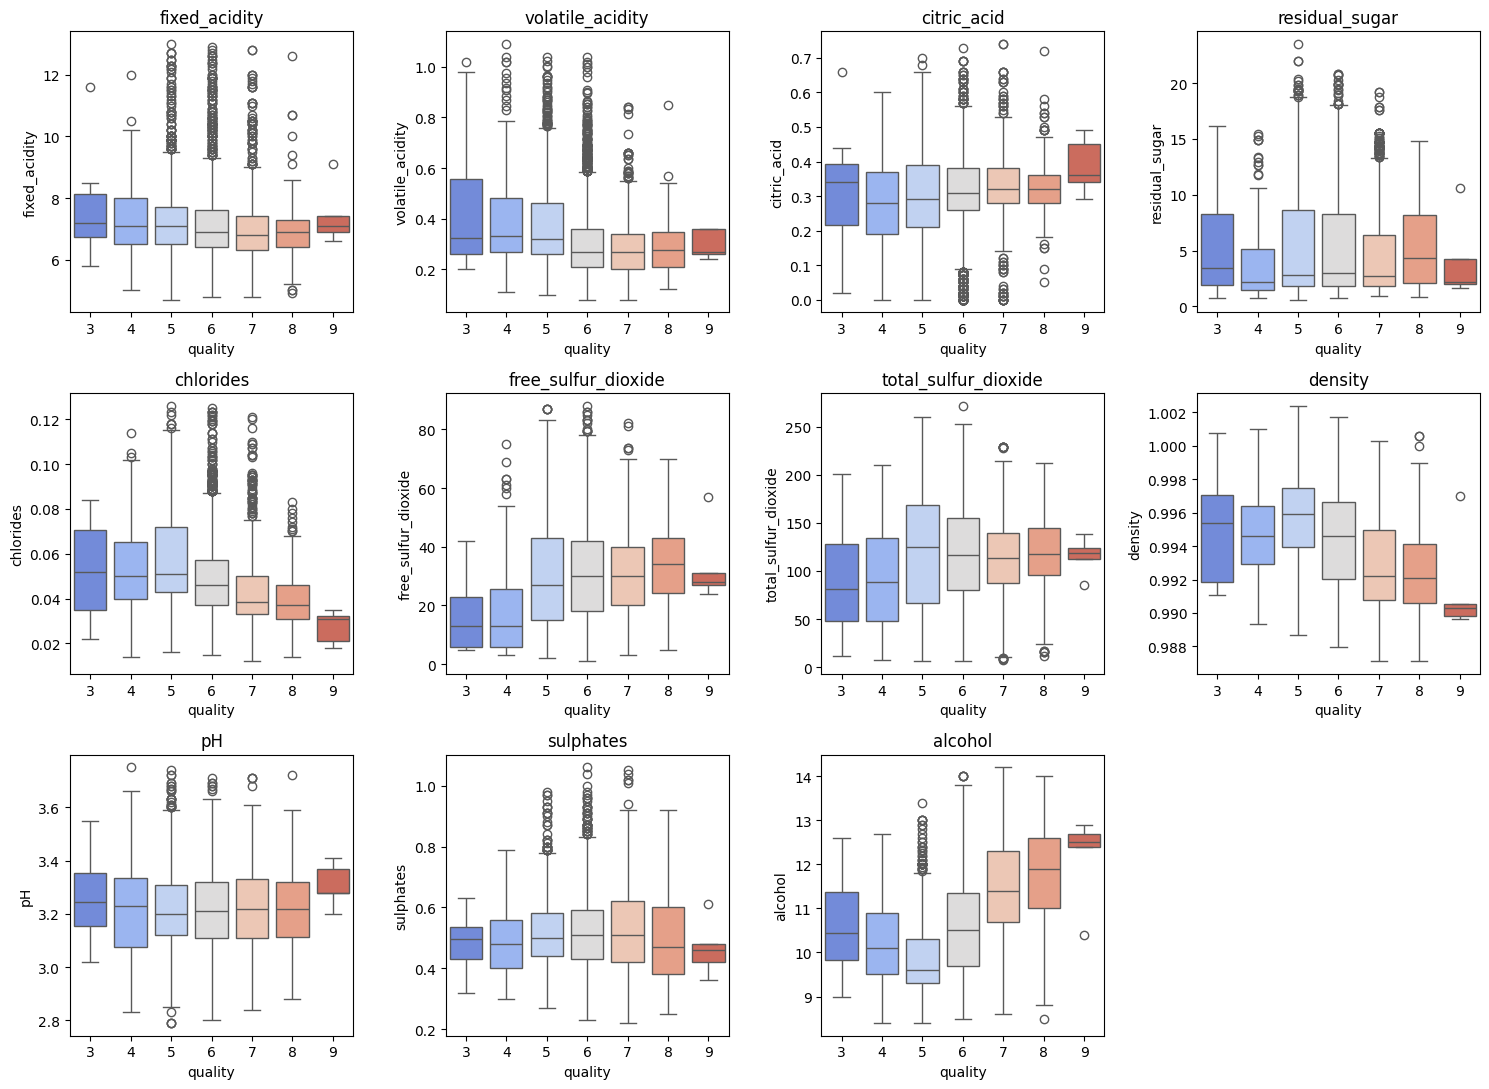

In [19]:
plt.figure(figsize=(15, 11))
for i, col in enumerate(cleaned_wine_df.columns[:-2], 1):  # Excluye "quality" y "wine_type"
    plt.subplot(3, 4, i)  
    sns.boxplot(x="quality", y=col, data=cleaned_wine_df, palette="coolwarm")
    plt.title(col)
plt.tight_layout()
plt.show()

📌 **Conclusión  en base a los resultados**

El gráfico nos ha llevado a concluir lo siguente para cada componente:

- **Acidez Fija:** Tiende a disminuir con la calidad.
- **Acidez Volátil:** Más baja en vinos de mejor calidad.
- **Ácido Cítrico:** Relación positiva con la calidad.
- **Azúcar Residual:** Sin una relación clara en los datos presentes.
- **Cloruros:** Más altos en vinos de menor calidad.
- **Dióxido de Azufre Libre y Total:** Menores niveles en vinos de mejor calidad.
- **Densidad y pH:** No muestran una tendencia clara.
- **Sulfatos:** Ligeramente mayores en vinos de alta calidad.
- **Alcohol:** Relación clara y positiva con la calidad.

Sabiendo esto: 

- **Indicadores positivos:** Alcohol, ácido cítrico y sulfatos.
- **Factores negativos:** Acidez volátil, cloruros y dióxido de azufre.
- **El pH y densidad no son concluyentes.**
- **A mayor calidad del vino, menor variabilidad en los valores de sus componentes.**


### Extra análisis

Para analizar la calidad del vino, hemos aplicado técnicas de **clustering** para identificar grupos de vinos con características fisicoquímicas similares. Puesto que realizar un clustering permite descubrir patrones en los datos sin necesidad de etiquetas previas, buscamos determinar si existen grupos naturales de vinos con propiedades similares y analizar si la calidad del vino está relacionada con esos grupos.

> 🔍**Nota:** Para elegir el número adecuado de clusters, usamos el **método del codo**. Este método evalúa la **inercia** (suma de distancias de cada punto a su centroide dentro de un cluster) y sugiere el número óptimo de clusters en el punto donde la reducción de inercia comienza a disminuir de manera menos pronunciada.

Para ello, utilizamos la función `optimal_clusters` y `cluster_wines`, ubicada en el módulo `src.E07_eda_wine_quality` 📍.  

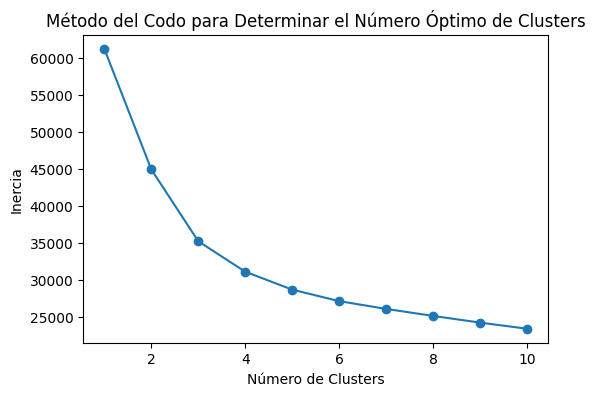

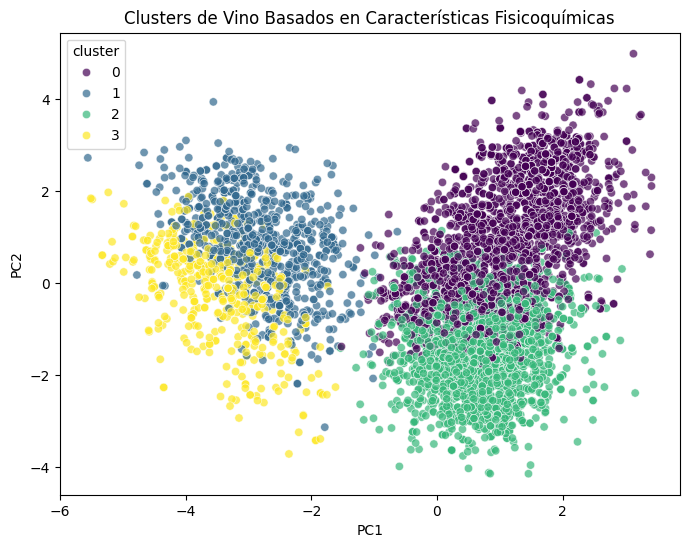

Distribución de cada variable en función de los clusters:


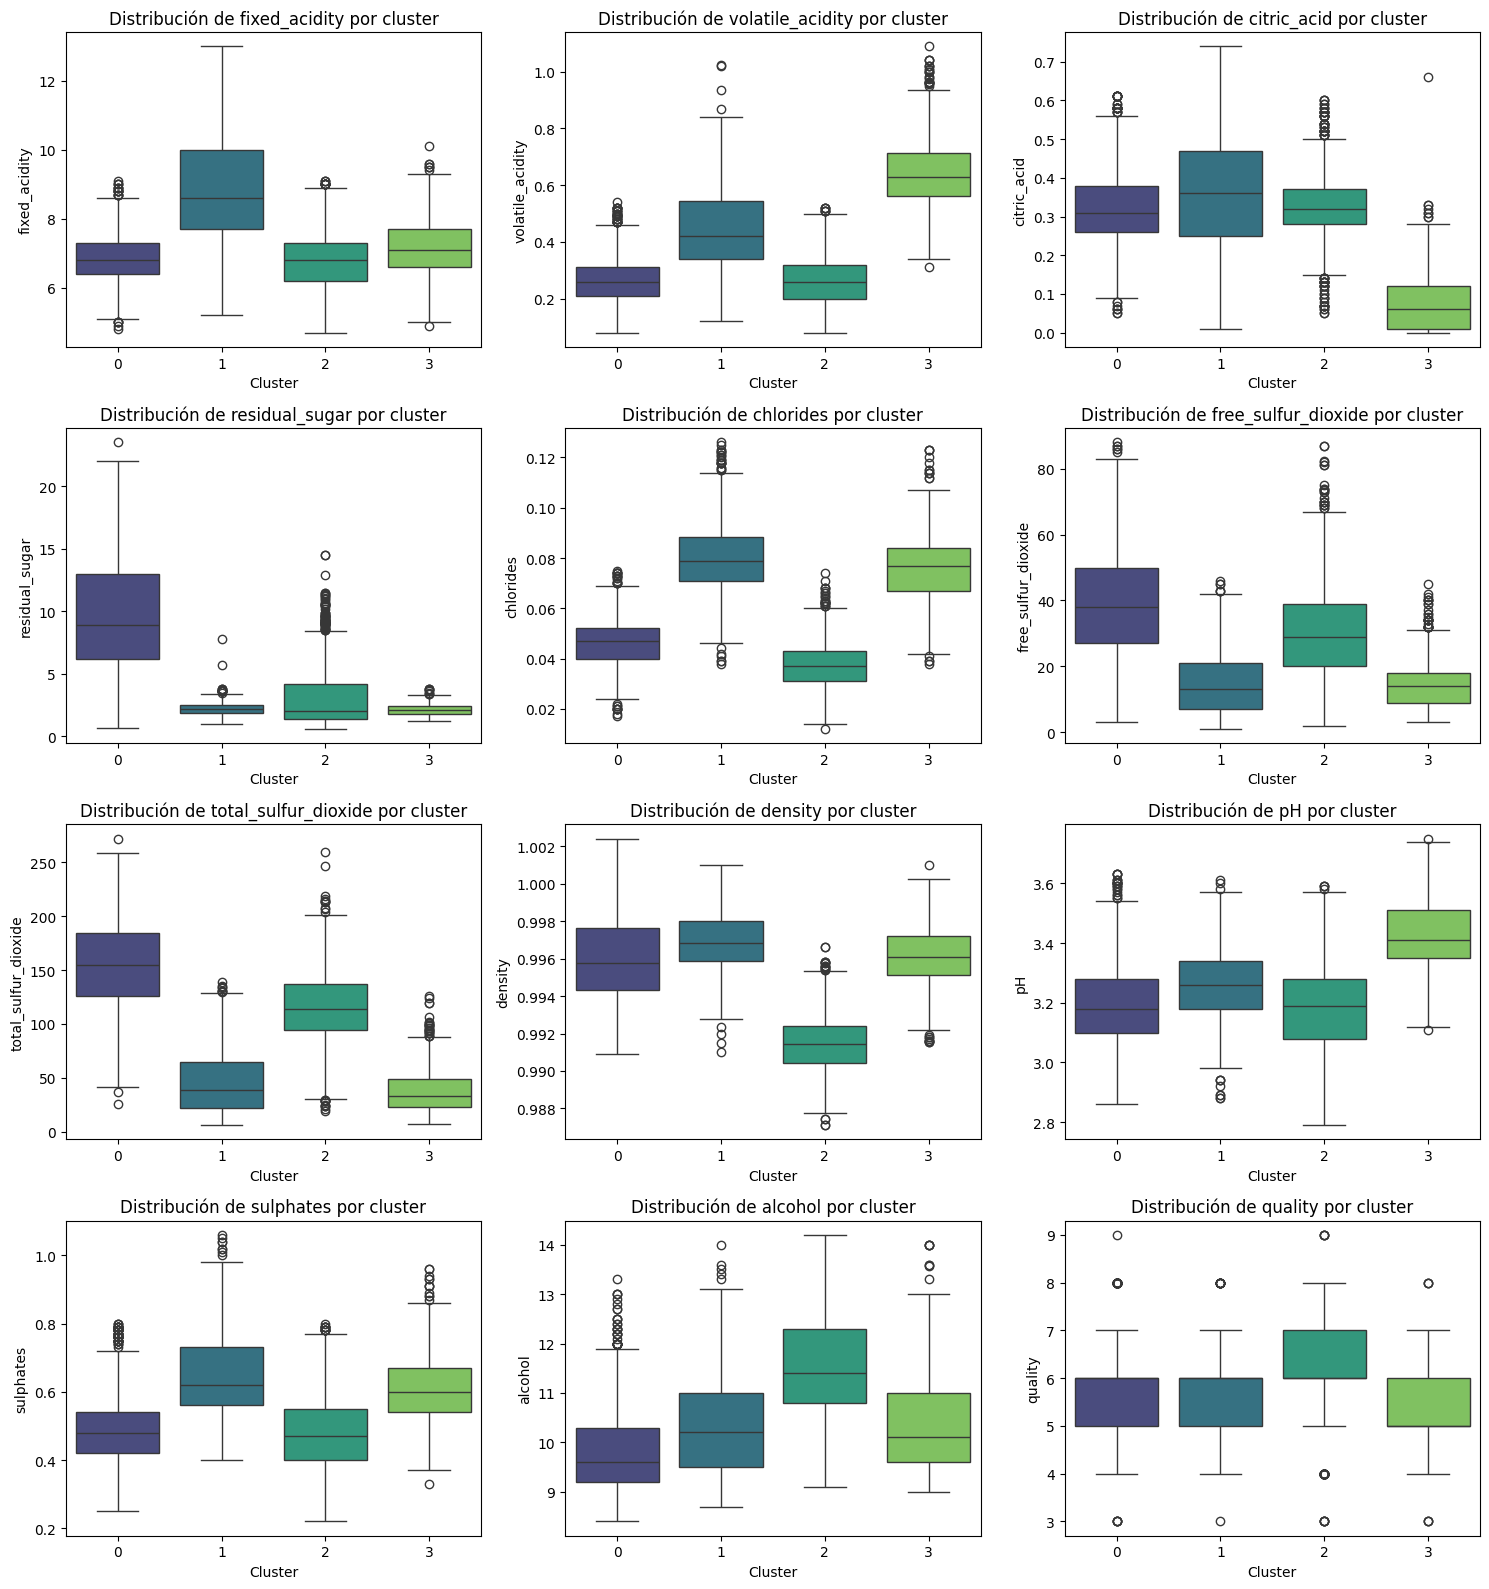

In [20]:
optimal_clusters(cleaned_wine_df)
df_clustering = cluster_wines(cleaned_wine_df, n_clusters=4)



Se observa que los vinos se agrupan de manera diferenciada en función de sus características fisicoquímicas, aunque no hay una separación completamente nítida entre ellos.

- **Relación entre clusters y calidad del vino**: Para evaluar si la calidad del vino está relacionada con los clusters obtenidos, generamos diagramas de caja que muestran la distribución de la calidad dentro de cada grupo. Los resultados muestran que **no hay una diferencia clara en la calidad promedio entre clusters**. Esto indica que, aunque los vinos pueden agruparse según sus propiedades fisicoquímicas, estas diferencias no se traducen en una variación significativa en la calidad.

- **Evaluación de la utilidad del clustering**: Al analizar la distribución de las distintas características fisicoquímicas por cluster se puede observar que algunas variables presentan diferencias notables entre clusters (por ejemplo, **fixed acidity** y **alcohol**), pero la calidad no muestra una separación clara entre grupos.

Por lo tanto, podemos concluir que el **clustering ha sido útil para explorar la estructura de los datos y caracterizar grupos de vinos con propiedades similares, pero no es una técnica determinante para predecir la calidad del vino**.